<center><h1>Teste de Hipóteses Qui-Quadrado (Chi-Squared Test)</h1></center>

# Introdução

O teste $\chi^2$ (lê-se *qui-quadrado*) é um procedimento projetado para testar a existência de relações significativas **entre duas variáveis discretas**.

## Tabela de contingência

Para aplicação do teste $\chi^2$, as informações coletadas (a partir da amostra) acerca das variáveis devem estar ​​organizadas em uma *tabela de contingência*.

Uma tabela de contingência (também conhecida como tabulação cruzada ou tabela de referência cruzada) é um tipo de tabela em um formato de matriz que exibe a distribuição de frequência das diversas combinações de valores das variáveis. Tabelas de contingência são muito utilizados em pesquisa de opinião, inteligência de negócios, engenharia e pesquisa científica. Elas fornecem uma imagem básica da inter-relação entre duas variáveis ​​e podem ajudar a encontrar interações entre elas.

Como exemplo, considere duas variáveis, ambas discretas: 

* `sexo` (com valores **Masculino** ou **Feminino**) 
* `animal de estimação` (com valores **Cachorro** ou **Gato**). 

Suponha que 100 indivíduos sejam amostrados aleatoriamente em uma população muito grande como parte de um estudo de diferenças de sexo e preferência por animal de estimação. Uma tabela de contingência pode ser criada para exibir as diversas quantidades de indivíduos na amostra: quantos são homens e preferem gatos, quantos homens preferem gatos, quantas mulheres preferem cachorros e quantas mulheres preferem gatos. Essa tabela de contingência é exibida abaixo ([fonte](https://math.stackexchange.com/questions/1233587/checking-dependency-of-variables-in-a-contingency-table)).

<center>

|               | Cachorro       | Gato       | Total |
| ---------     | -------------- | ---------- | ----- |
| **Masculino** | 42             | 10         | 52    |
| **Feminino**  | 9              | 39         | 48    |
| **Total**     | 51             | 49         | 100   |

</center>

Ainda com relação ao exemplo acima, repare que

- a coluna mais à direita apresenta os totais por linha,
- a linha mais abaixo exibe os totais por coluna,
- a célula inferior direita o total geral de indivíduos da amostra.

As informações dos totais por linha e por coluna são opcionais na representação de uma tabela de contingência. Além disso, tabelas de contingência não precisam envolver apenas variáveis binárias. Contanto que as variáveis sejam discretas (e com uma quantidade de valores dentro do aceitável), uma tabela de contingência pode ser usada. No exemplo a seguir ([fonte](http://www.sthda.com/sthda/RDoc/data/housetasks.txt)), as variáveis apresentam quatro e treze valores, respectivamente. Note também que não são fornecidos os totais nas margens da tabela.

<center>

| Task        | Wife | Alternating | Husband | Jointly |
|-------------|------|-------------|---------|---------|
| Laundry     | 156  | 14          | 2       | 4       |
| Main_meal   | 124  | 20          | 5       | 4       |
| Dinner      | 77   | 11          | 7       | 13      |
| Breakfast   | 82   | 36          | 15      | 7       |
| Tidying     | 53   | 11          | 1       | 57      |
| Dishes      | 32   | 24          | 4       | 53      |
| Shopping    | 33   | 23          | 9       | 55      |
| Official    | 12   | 46          | 23      | 15      |
| Driving     | 10   | 51          | 75      | 3       |
| Finances    | 13   | 13          | 21      | 66      |
| Insurance   | 8    | 1           | 53      | 77      |
| Repairs     | 0    | 3           | 160     | 2       |
| Holidays    | 0    | 1           | 6       | 153     |

</center>


## Independência estatística

A independência estatística é um conceito importante na Teoria das Probabilidades. Considere dois eventos $A$ e $B$. Se o conhecimento da ocorrência do evento $A$ não muda a probabilidade de ocorrência do evento $B$, então escrevemos:

$$
\Pr(B|A) = \Pr(B)
$$

Sob a condição acima, a probabilidade conjunta dos eventos $A$ e $B$ é igual ao produto das probabilidades dos eventos $A$ e $B$: $\Pr(A,B) = \Pr(A) \times \Pr(B)$. Esses eventos são então considerados **estatisticamente independentes**.

A independência estatística não deve ser confundida com outra propriedade que pode existir entre eventos, a exclusividade mútua. Se a probabilidade conjunta de dois eventos $A$ e $B$ for zero, esses eventos são ditos mutuamente exclusivos ou disjuntos. O seguinte destaca as condições sob as quais dois eventos são estatisticamente independentes e mutuamente exclusivos:

- $\Pr(A,B) = \Pr(A) \times \Pr(B) \iff \text{eventos independentes}$
- $\Pr(A,B) = 0 \iff \text{eventos mutuamente exclusivos}$

No contexto da Inferência Estatística, o conceito de **evento** está relacionado aos valores que uma variável aleatória assume. Além disso, o conceito de independência estatística entre duas variáveis aleatórias pode ser usado como um indicador de presença ou ausência de dependência entre elas. Em particular, se duas variáveis são independentes, as distribuições percentuais na tabela de contingência são idênticas.

> Se há dependências entre duas variáveis, dizemos que essas variáveis estão **associadas**.

Como exemplo, considere novamente a tabela de contingência usada em exemplo anterior e reapresentada abaixo. 

<center>

|               | Cachorro       | Gato       | Total |
| ---------     | -------------- | ---------- | ----- |
| **Masculino** | 42             | 10         | 52    |
| **Feminino**  | 9              | 39         | 48    |
| **Total**     | 51             | 49         | 100   |

</center>

Nesse contexto, há duas variáveis aleatórias binárias: 
* **Sexo** 
* **Preferência** (por animal de estimação preferido)

Os dados nessa tabela parecem indicar que as variáveis **não** são estatisticamente independentes, i.e., que há associação entre elas. Para ententer porque, repare que a maioria das mulheres prefere gatos (39 contra 9), enquanto que a maioria dos homens prefere cachorros (42 contra 10). Se essas variáveis fossem efetivamente independentes, deveríamos esperar encontrar preferências aproximadamente iguais por gatos e cachorros, tanto no grupo de mulheres quanto no de homens.

Visto que os dados apresentados na tabela acima são correspondentes a uma amostra da população, surge a seguinte questão:

> O enviesamento observado é obra do acaso (e portanto não reflete a distribuição da população), ou é consequência de as variáveis serem estatisticamente dependentes?

A questão acima pode ser investigada por meio do teste $\chi^2$.

## Distribuição Qui-Quadrado

A estatística usada no teste $\chi^2$ segue a distribuição homônima, a [distribuição $\chi^2$](https://en.wikipedia.org/wiki/Chi-squared_distribution). A distribuição qui-quadrado (𝜒²) é uma distribuição contínua assimétrica. A variável aleatória $X \sim \chi^2_k$ com $k$ graus de liberdade é a soma dos quadrados de $k$ variáveis normais padrão independentes:

$$
X = \sum_{i=1}^{k} Z_i^2, \quad Z_i \sim N(0,1)
$$

A figura a seguir ([fonte](https://en.wikipedia.org/wiki/Chi-squared_distribution)) apresenta os gráficos de diversas funções de densidade que seguem a distribuição $\chi^2$. Essa distribuição possui um parâmetro, $k$, a quantidade de graus de liberdade.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/1024px-Chi-square_pdf.svg.png" width="600"/>
</p>

A biblioteca scipy disponibiliza o pacote de funções [chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html), que permite manipular variáveis aleatórias que seguem a distribuição chi-quadrado.

Como exemplo, suponha uma variável aleatória que siga a distribuição qui-quadrado com 9 graus de liberdade. Se quisermos saber que valor dessa variável delimita 95% da distribuição, podemos usar a função `ppf`, conforme o bloco de código abaixo.

In [1]:
from scipy.stats import chi2

print(chi2.ppf(.95, df=2))
print(chi2.cdf(5.9914, df=2))


5.991464547107979
0.9499983862962607


## Tipos de Testes Qui-Quadrado

### 1. Teste de Aderência (Goodness-of-fit)

Verifica se uma distribuição observada se ajusta a uma distribuição teórica esperada. Neste tipo de teste, testamos se uma determinada amostra é proveniente de uma suposta distribuição de probabilidade;

**Declaração das hipóteses:**
* $H_0$: A distribuição observada segue a distribuição teórica.
* $H_a$: A distribuição observada não segue a distribuição teórica.

### 2. Teste de Independência

Verifica se há associação (i.e., dependência estatística) entre duas variáveis categóricas. Neste teste, temos interesse em verificar se as variáveis com distribuições nas marginais são independentes ou não.


**Declaração das hipóteses:**
* $H_0$: As variáveis são independentes.
* $H_a$: As variáveis são associadas.


Neste tipo de teste $\chi^2$, as hipóteses devem ser declaradas da seguinte forma:
- A hipótese nula ($H_0$) deve afirmar que não existe associação entre as duas variáveis.
- A hipótese de pesquisa ($H_a$) declara que as duas variáveis ​estão associadas na população.

### 3. Teste de Homogeneidade

Verifica se **duas ou mais populações** seguem a **mesma distribuição** de uma variável categórica. Em outras palavras, testamos se uma determinada variável se distribui da mesma forma em várias populações de interesse.

- $H_0$: Todas as probabilidades numa mesma colunas são iguais ($p_{1j} = \ldots = p_{rj} = p_j$, para todo $j$).
- $H_a$: Pelo menos uma das probabilidades é diferente de $p_{ij}$ é diferente de $p_j$, para algum $j$

---

# Estatística qui-quadrado

A estatística qui-quadrado mede o desvio entre o que foi observado nos dados e o que seria esperado caso não houvesse relação entre as variáveis (sob $H_0$). Essa estatística é calculada por meio da consulta aos valores contidos em uma tabela de contingência.

$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

* $O_{ij}$: **Frequência observada**. Frequências observadas (*observed frequencies*) são valores efetivamente observados na tabela de contingência (ou derivados dela).
* $E_{ij}$: **Frequência esperada sob $H_0$**. Frequências esperadas (*expected frequencies*) são valores que seriam esperados se as duas variáveis fossem estatisticamente independentes. Calculamos uma frequência observada para cada par de valores das variáveis.

> A estatística qui-quadrado é uma soma de desvios normalizados: se o observado é muito diferente do esperado, o numerador é grande, e a estatística assume valores grandes. 

Para computar a estatística $\chi^2$, é necessário computar as frequências esperadas para cada célula $(i,j)$ da tabela de contingência. Para isso, basta multiplicar os totais de linha e de coluna para essa célula e dividir o produto resultante pelo número total de casos na tabela (representado por $N$ na equação abaixo).

$$
E_{ij} = \frac{{\text{total da linha $i$} \times \text{total da coluna $j$}}}{N}
$$

Como exemplo, retornemos à tabela de contingência usada em exemplo anterior e reapresentada abaixo.

<center>

|               | Cachorro       | Gato       | Total |
| ---------     | -------------- | ---------- | ----- |
| **Masculino** | 42             | 10         | 52    |
| **Feminino**  | 9              | 39         | 48    |
| **Total**     | 51             | 49         | 100   |

</center>

Se não houver associação entre as variáveis **Sexo** e **Preferência**, as frequências esperadas são calculadas como:

- $E_{11} = f_e$(Masculino, Cachorro) = $\frac{51 \times 52}{100} = 26.52$

- $E_{12} = f_e$(Masculino, Gato) = $\frac{49 \times 52}{100} = 25.48$

- $E_{21} = f_e$(Feminino, Cachorro) = $\frac{51 \times 48}{100} = 24.48$

- $E_{22} = f_e$(Feminino, Gato) = $\frac{49 \times 48}{100} = 23.52$

Podemos organizar essas frequências esperadas em outra tabela de contingência:
<center>

| Sexo      | Cachorro | Gato  |
| --------- | ---------| ------|
| Masculino | 26.52    | 25.48 |
| Feminino  | 24.48    | 23.52 |

</center>

De posse das frequências esperadas e observadas, é possível computar o valor da estatística:

$$
\chi^2 = \frac{(26.52-42)^2}{26.52} + \frac{(25.48-10)^2}{25.48} + \frac{(24.48-9)^2}{24.48} + \frac{(23.52-39)^2}{23.52} \approx 38.41
$$

A célula de código abaixo realiza o mesmo cálculo, para fins de conferência.

In [2]:
import numpy as np

exp_11 = 51*52/100
exp_12 = 49*52/100
exp_21 = 51*48/100
exp_22 = 49*48/100
print(exp_11)
print(exp_12)
print(exp_21)
print(exp_22)

qui_square = np.square(exp_11 - 42)/exp_11 + np.square(exp_12 - 10)/exp_12 + np.square(exp_21 - 9)/exp_21 + np.square(exp_22 - 39)/exp_22
print(qui_square)

26.52
25.48
24.48
23.52
38.41767476221258


# Passos do procedimento

1. Declarar as hipóteses nula e alternativa
2. Montar a tabela de contingência
3. Computar a estatística de teste
4. Calcular o valor $p$ correspondente
5. Tomar uma decisão e interpretar o resultado

# Aplicação do teste

No contexto do teste $\chi^2$, a distribuição $\chi^2$
indica a probabilidade de obter um determinado valor, presumindo que não existe relação (na população) entre as duas variáveis. Ainda no contexto desse teste, o valor do parâmetro $k$ é calculado por meio da expressão

$$
k = (r – 1) \times (c – 1)
$$

onde
- $r$ = quantidade de linhas da tabela, e
- $c$ = quantidade de colunas da tabela.

Seguindo com o exemplo anterior, o parâmetro $k$ pode ser calcular conforme a seguir:

$$
k = (2-1)(2-1) = 1
$$

De posse dos valores da estatística ($\chi^2 = 38.41$) e do parâmetro ($k=1$), podemos computar o valor corresponde de $p$.

Considere que foi definido um nível de significância igual a 5% para o estudo estatístico. Usando a função [scipy.stats.chi2.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2), concluímos que o valor $3.84$, conhecido como valor crítico, é o que separa 5% da área da curva à direita. Por outro lado, o valor $\chi^2 = 38.41$ é muito maior do que $3.84$. De fato, o valor obtido para a estatística está relacionado um valor $p$ virtualmente igual a $0$. Então parece muito claro que as variáveis ​​categóricas são **dependentes** na população da qual a amostra de 100 observações foi escolhida aleatoriamente.

In [3]:
from scipy.stats import chi2
x = 38.41
k = 1
print('valor crítico: %.2f' % chi2.ppf(.95, k))
print('p: %f' % (1 - chi2.cdf(x,k)))

valor crítico: 3.84
p: 0.000000


Uma forma mais direta de aplicar o teste qui-quadrado é usar a função [`scipy.stats.chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html). 

> `chisquare(f_obs, f_exp=None, ddof=0, axis=0, *, sum_check=True)`

Veja o exemplo abaixo.

In [4]:
from scipy.stats import chisquare
chisquare(f_obs = [42, 10, 9, 39],
          f_exp = [26.52, 25.48, 24.48, 23.52], 
          ddof = 1)

Power_divergenceResult(statistic=np.float64(38.41767476221258), pvalue=np.float64(4.54682167469138e-09))

# Condições de aplicabilidade

Diferente dos testes estudados até aqui ($z$-teste, $t$-teste, ANOVA), o teste $\chi^2$ não requer suposições sobre a distribuição da população da qual a amostra é retirada. Ou seja, o $\chi^2$ é um teste estatístico não-paramétrico.

No entanto, assim como outras técnicas inferenciais, esse teste possui algumas consições de aplicabilidade:

* As variáveis do estudo devem ser categóricas.

* As observações devem ser independentes (i.e., presume que foi realizada amostragem aleatória.). Cada resposta deve vir de uma unidade estatística **independente** das demais.

* A frequência esperada de cada célula da tabela de contingência deve ser razoavelmente grande. Como regra prática, costuma-se usar o seguinte:
  * Nenhuma célula com frequência esperada < 1.
  * No máximo 20% das células com frequência esperada < 5.

Avaliar as **condições de aplicabilidade** é essencial antes de confiar nos resultados do teste qui-quadrado.



# Exemplos

Nos exemplos a seguir, considere $\alpha = 0.05$.

## Exemplo 1: Teste de Independência

Vamos aplicar o teste aos dados dos casais, com suas tarefas domésticas e definição do(s) executor(es).
<center>

| Task        | Wife | Alternating | Husband | Jointly |
|-------------|------|-------------|---------|---------|
| Laundry     | 156  | 14          | 2       | 4       |
| Main_meal   | 124  | 20          | 5       | 4       |
| Dinner      | 77   | 11          | 7       | 13      |
| Breakfast   | 82   | 36          | 15      | 7       |
| Tidying     | 53   | 11          | 1       | 57      |
| Dishes      | 32   | 24          | 4       | 53      |
| Shopping    | 33   | 23          | 9       | 55      |
| Official    | 12   | 46          | 23      | 15      |
| Driving     | 10   | 51          | 75      | 3       |
| Finances    | 13   | 13          | 21      | 66      |
| Insurance   | 8    | 1           | 53      | 77      |
| Repairs     | 0    | 3           | 160     | 2       |
| Holidays    | 0    | 1           | 6       | 153     |

</center>

✅**Solução**

No caso do conjunto **"house tasks"**, a hipóteses que estamos considerando com o **teste qui-quadrado de independência** são as seguintes:

> $H_0$: A **distribuição de quem executa a tarefa doméstica** é **independente** do **tipo de tarefa**.

Em outras palavras, $H_0$ declara que **o tipo de tarefa e a pessoa responsável por ela são variáveis independentes**.

> $H_a$: Existe uma **associação** entre o tipo de tarefa e quem a realiza.

Ou seja, $H_a$ declara que a responsabilidade pela tarefa **depende** do tipo de tarefa — alguns tipos tendem a ser realizados por certas pessoas mais do que outras.

**Interpretação prática:**

* Se **aceitarmos $H_0$**, isso sugere que **todas as pessoas (wife, husband, alternating, jointly)** compartilham **igualmente** as responsabilidades, independentemente da tarefa.
* Se **rejeitarmos $H_0$** (como no nosso caso, com valor-p ≈ 0), isso indica que **há padrões sistemáticos** — por exemplo, tarefas como "Laundry" ou "Repairs" são **fortemente associadas a uma pessoa específica**.

O trecho de código abaixo realiza a aplicação do teste.

In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Criar o DataFrame com os dados da tabela
data = {
    "Wife": [156, 124, 77, 82, 53, 32, 33, 12, 10, 13, 8, 0, 0],
    "Alternating": [14, 20, 11, 36, 11, 24, 23, 46, 51, 13, 1, 3, 1],
    "Husband": [2, 5, 7, 15, 1, 4, 9, 23, 75, 21, 53, 160, 6],
    "Jointly": [4, 4, 13, 7, 57, 53, 55, 15, 3, 66, 77, 2, 153]
}

tasks = [
    "Laundry", "Main_meal", "Dinner", "Breakfast", "Tidying", "Dishes", "Shopping",
    "Official", "Driving", "Finances", "Insurance", "Repairs", "Holidays"
]

df = pd.DataFrame(data, index=tasks)

# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(df)

chi2_stat, p_val, dof, pd.DataFrame(expected, index=tasks, columns=df.columns)

(np.float64(1944.4561959955277),
 np.float64(0.0),
 36,
                 Wife  Alternating    Husband    Jointly
 Laundry    60.550459    25.633028  38.449541  51.366972
 Main_meal  52.637615    22.283257  33.424885  44.654243
 Dinner     37.155963    15.729358  23.594037  31.520642
 Breakfast  48.165138    20.389908  30.584862  40.860092
 Tidying    41.972477    17.768349  26.652523  35.606651
 Dishes     38.876147    16.457569  24.686353  32.979931
 Shopping   41.284404    17.477064  26.215596  35.022936
 Official   33.027523    13.981651  20.972477  28.018349
 Driving    47.821101    20.244266  30.366399  40.568234
 Finances   38.876147    16.457569  24.686353  32.979931
 Insurance  47.821101    20.244266  30.366399  40.568234
 Repairs    56.766055    24.030963  36.046445  48.156537
 Holidays   55.045872    23.302752  34.954128  46.697248)

**Resultado do Teste**

- Estatística $\chi^2$: 1944.46

- Valor-p: ~ 0.0 (menor que qualquer nível de significância usual)

- Graus de liberdade (GL): 36

**Conclusão**: Rejeitamos fortemente a hipótese nula. Há evidência estatística de que a distribuição de quem realiza a tarefa depende do tipo de tarefa — ou seja, há associação entre tarefa e executor.

Para inspecionar de forma mais detalhada esse resultado, vamos construir uma visualização que destaque quais células mais violam a hipótese de independência — ou seja, as principais fontes da associação. Essa visualização ajuda a responder o seguinte:

> Quais pares (tipo de tarefa × executor) mais violam a hipótese de independência?

<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_27511/3032037151.py:31: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Contribuição de cada célula para a estatística $\chi^2$")


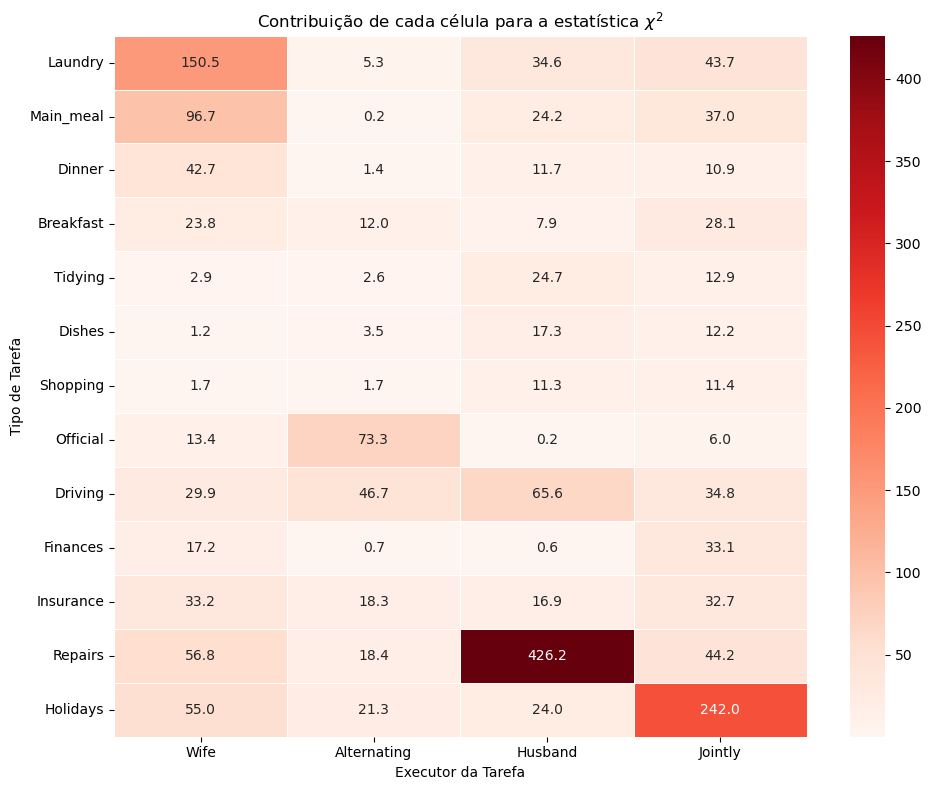

In [6]:
# Recarregar bibliotecas e dados após reset do estado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Dados
data = {
    "Wife": [156, 124, 77, 82, 53, 32, 33, 12, 10, 13, 8, 0, 0],
    "Alternating": [14, 20, 11, 36, 11, 24, 23, 46, 51, 13, 1, 3, 1],
    "Husband": [2, 5, 7, 15, 1, 4, 9, 23, 75, 21, 53, 160, 6],
    "Jointly": [4, 4, 13, 7, 57, 53, 55, 15, 3, 66, 77, 2, 153]
}

tasks = [
    "Laundry", "Main_meal", "Dinner", "Breakfast", "Tidying", "Dishes", "Shopping",
    "Official", "Driving", "Finances", "Insurance", "Repairs", "Holidays"
]

df = pd.DataFrame(data, index=tasks)

# Frequências esperadas e contribuições
chi2_stat, p_val, dof, expected = chi2_contingency(df)
expected_df = pd.DataFrame(expected, index=tasks, columns=df.columns)
contrib = (df - expected_df) ** 2 / expected_df

# Heatmap das contribuições
plt.figure(figsize=(10, 8))
sns.heatmap(contrib, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5)
plt.title("Contribuição de cada célula para a estatística $\chi^2$")
plt.xlabel("Executor da Tarefa")
plt.ylabel("Tipo de Tarefa")
plt.tight_layout()
plt.show()


**Interpretação do Gráfico:**

* **Células com cores mais escuras** (e valores mais altos) indicam **forte discrepância entre observado e esperado**.
* Entre os **principais contribuintes** para o $\chi^2$, destacam-se:

  * `Laundry` × `Wife` (150.5): muito acima do esperado → tarefa fortemente associada à esposa.
  * `Repairs` × `Husband` (426.2): disparado maior valor → reparos são quase exclusivamente atribuídos ao marido.
  * `Holidays` × `Jointly` (242.0): férias são planejadas em conjunto bem mais do que o esperado.
  * `Main_meal` × `Wife` (96.7): principal refeição também associada à esposa.
  * `Official` × `Alternating` (73.3): tarefas administrativas feitas alternadamente mais que o esperado.

A visualização acima é especialmente útil para entender que **a rejeição da hipótese nula não significa que todas as células são discrepantes**, mas sim que **algumas associações específicas são responsáveis por essa diferença**.

---

## Exemplo 2: Condições de Aplicabilidade

Neste exemplo, em vez de aplicar o teste, vamos verificar as **condições de aplicabilidade** para os dados dos casais com suas tarefas domésticas e atribuições.

#### 1. **Variáveis categóricas?**

✅ **Verifica?** → **Sim**

Neste caso, temos duas variáveis categóricas:
- `Tarefa` (com valores `Laundry`, `Main_meail`, ..., `Holydays`)
- `Atribuição` (com valores `Wife`, `Alternating`, `Husband`, `Jointly`)

#### 2. **Independência das observações**

✅ **Verifica?** → **Sim**, presumivelmente cada linha corresponde a tarefas distintas e cada contagem é independente.

**Suposição razoável** se os dados foram coletados por pessoa/tarefa.

#### 3. **Frequências esperadas razoavelmente grandes**

Vamos verificar isso diretamente por meu de um código em Python:

In [7]:
import numpy as np

# Flatten a matriz de frequências esperadas
flat_expected = expected.flatten()
less_than_5 = np.sum(flat_expected < 5)
less_than_1 = np.sum(flat_expected < 1)
total_cells = flat_expected.size

percent_below_5 = 100 * less_than_5 / total_cells
less_than_1, less_than_5, percent_below_5

(np.int64(0), np.int64(0), np.float64(0.0))

Verificação das Condições Numéricas:

* **Células com frequência esperada < 1**: `0`
* **Células com frequência esperada < 5**: `0`
* **Percentual de células com frequência esperada < 5**: `0.0%`

✅ **Verifica?** → **Sim**

### Conclusão:

As **condições de aplicabilidade estão plenamente satisfeitas**:

* As observações são presumivelmente independentes.
* As frequências esperadas são todas suficientemente grandes.

Portanto, **o uso do teste qui-quadrado é válido e apropriado** para este conjunto de dados.

---

## Exemplo 3: Teste de Independência

O conjunto de dados survey contém dados sobre hábitos de fumo e de atividades físicas de estudantes, dentre outras informações.

- hábitos de tabagismo (`Smoke`)
- nível de prática de exercícios físicos (`Exer`)

Seja usar o teste $\chi^2$ para verificar se as variáveis são independentes.

✅**Solução**

In [8]:
import pandas as pd
df_survey = pd.read_csv('../data/survey.csv')
df_survey[['Smoke', 'Exer']].head()

,Smoke,Exer
0,Never,Some
1,Regul,NaN
2,Occas,NaN
3,Never,NaN
4,Never,Some


O pacote Pandas fornece a função [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html), usada para montar a tabela de contingência para a aplicação posterior do teste $\chi^2$. Veja a célula de código a seguir.

In [9]:
tbl = pd.crosstab(df_survey.Smoke, df_survey.Exer)
tbl

Exer,Freq,Some
Smoke,,
Heavy,7,3
Never,87,84
Occas,12,4
Regul,9,7


Por inspeção da tabela acima, percebemos que a variável `Exer` contém três valores, e a variável `Smoke` contém quatro valores.

De posse da tabela de contingência, podemos usar a função [scipy.stats.chi2_contingency](scipy.stats.chi2_contingency) para aplicar diretamente o teste $\chi^2$.

In [10]:
from scipy.stats import chi2_contingency
chi2_contingency(tbl)

Chi2ContingencyResult(statistic=np.float64(4.574966550693501), pvalue=np.float64(0.20570012488442274), dof=3, expected_freq=array([[ 5.39906103,  4.60093897],
       [92.32394366, 78.67605634],
       [ 8.63849765,  7.36150235],
       [ 8.63849765,  7.36150235]]))

Ao ser invocada, a função chi2_contingency retorna uma tupla de componentes conforme descrição abaixo:

1. o valor da estatística qui-quadrado ($4.57$) ;
2. o $p$-valor ($0.2057$);
3. a quantidade de graus de liberdade (3);
4. as frequências esperadas, na forma de uma matriz.

Porque o valor de $p = 0.2057$ é maior do que o nível de significância de $\alpha=0.05$, não temos evidência para rejeitar a hipótese nula de que o hábito de fumar seja independente do nível de exercício dos alunos.

---

## Exemplo 4: Teste de Independência

São coletados dados de prefêrencia por um novo produto, conforme a tabela a seguir.

<center>

|           | Gosta | Não gosta |
| --------- | ----- | --------- |
| Masculino | 30    | 20        |
| Feminino  | 20    | 30        |

</center>

Será que **gênero** está associado ao **gosto pelo novo produto**?

✅**Solução**

Esse é um **teste de independência** entre as variáveis `gênero` e `opinião sobre o produto`. As hipóteses são formuladas da seguinte forma:

> $H_0$: Gênero e opinião sobre o novo produto são variáveis independentes.

Ou seja, a hipótese nula declara que a distribuição de preferências (gostar ou não) é a mesma entre homens e mulheres.

> $H_a$: Gênero e opinião sobre o novo produto são variáveis associadas.

Ou seja, a hipótese alternativa declara que o gênero influencia a opinião sobre o produto — as distribuições são diferentes.

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

# Criar a tabela
table = np.array([[30, 20],
                  [20, 30]])

chi2_stat, p_val, dof, expected = chi2_contingency(table)

print(f'Estatística qui-quadrado: {chi2_stat:.4f}')
print(f'Valor-p: {p_val:.4f}')
print(f'GL: {dof}')
print('Frequências esperadas sob H0:')
print(expected)

Estatística qui-quadrado: 3.2400
Valor-p: 0.0719
GL: 1
Frequências esperadas sob H0:
[[25. 25.]
 [25. 25.]]


O valor-p não é menor do que $\alpha = 0.05$. Sendo assim, falhamos em rejeitar $H_0$: não há evidência de associação entre gênero e preferência.

---

## Exemplo 5: Teste de Aderência

Suponha que uma empresa afirma que 25% dos seus produtos são A, 25% B, 25% C e 25% D. Observamos a seguinte distribuição após uma amostra:

<center>

| Categoria | Frequência Observada |
| --------- | -------------------- |
| A         | 20                   |
| B         | 18                   |
| C         | 22                   |
| D         | 40                   |

</center>

Com esses dados, queremos verificar a alegação da empresa de que produz uniformemente produtos dos quatro tipos.

✅**Solução**

Esse é um caso clássico de teste de aderência (*goodness-of-fit*), onde comparamos uma distribuição observada com uma distribuição teórica esperada (uniforme, neste caso).

Hipóteses do teste:

> $H_0$: A distribuição dos produtos segue uma distribuição **uniforme** nas quatro categorias (A, B, C, D).
> Ou seja, **cada tipo representa 25% da produção** da empresa.

$$
H_0: P_A = P_B = P_C = P_D = 0{,}25
$$

> $H_a$: A distribuição dos produtos **não segue uma distribuição uniforme**.
> Pelo menos uma das proporções é diferente de 25%.

$$
H_1: \text{Pelo menos uma } P_i \ne 0{,}25
$$

Essa hipótese será testada com um **teste qui-quadrado de aderência**, usando as frequências esperadas baseadas na distribuição uniforme (número total de itens × 25%).

In [12]:
from scipy.stats import chisquare

observed = [20, 18, 22, 40]
expected = [25, 25, 25, 25]  # frequências esperadas uniformes

chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print(f'Estatística qui-quadrado: {chi2_stat:.4f}')
print(f'Valor-p: {p_val:.4f}')

Estatística qui-quadrado: 12.3200
Valor-p: 0.0064


O valor-p é menor do que $\alpha = 0.05$. Sendo assim, rejeitamos $H_0$: os dados **não seguem** uma distribuição uniforme.

---

## Exemplo 6: Teste de Homogeneidade 

Uma rede de supermercados deseja saber se **o padrão de preferência por tipos de pagamento** (dinheiro, cartão, PIX) é o **mesmo em três lojas diferentes**.

São coletados dados de clientes dessas três lojas. Dados observados:

<center>

| Forma de Pagamento | Loja A | Loja B | Loja C |
| ------------------ | ------ | ------ | ------ |
| Dinheiro           | 30     | 25     | 20     |
| Cartão             | 45     | 40     | 35     |
| PIX                | 25     | 35     | 45     |

</center>

✅**Solução**

Hipóteses do Teste:

* **$H_0$**: As distribuições de forma de pagamento são iguais nas três lojas (homogeneidade).
* **$H_1$**: Pelo menos uma loja tem uma distribuição diferente (não homogênea).

In [13]:
import numpy as np
from scipy.stats import chi2_contingency

# Tabela de frequências observadas
table = np.array([
    [30, 25, 20],  # Dinheiro
    [45, 40, 35],  # Cartão
    [25, 35, 45]   # PIX
])

# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(table)

print(f'Estatística qui-quadrado: {chi2_stat:.4f}')
print(f'Valor-p: {p_val:.4f}')
print(f'Graus de liberdade: {dof}')
print('Frequências esperadas sob H0:')
print(expected)

Estatística qui-quadrado: 8.9643
Valor-p: 0.0620
Graus de liberdade: 4
Frequências esperadas sob H0:
[[25. 25. 25.]
 [40. 40. 40.]
 [35. 35. 35.]]


Interpretação

* **Se o valor-p < 0.05**, rejeitamos $H_0$: há **evidência de que as distribuições diferem entre as lojas**.
* **Se o valor-p ≥ 0.05**, não rejeitamos $H_0$: não há evidência suficiente para afirmar que as lojas têm distribuições diferentes.

Repare que o teste de homogeneidade é estruturalmente idêntico ao teste de independência (mesma estatística), mas a **interpretação muda**:

* **Teste de independência**: duas variáveis em uma única amostra.
* **Teste de homogeneidade**: uma única variável categórica observada em **grupos diferentes**.

---

## Exercício Proposto

Considere os dados:

<center>

| Cor do Carro | Acidente | Sem Acidente |
| ------------ | -------- | ------------ |
| Vermelho     | 15       | 35           |
| Preto        | 30       | 45           |
| Branco       | 25       | 50           |

</center>

1. Formule as hipóteses para testar se a cor do carro está associada à ocorrência de acidentes.
2. Aplique o teste de independência em Python.
3. Interprete os resultados.

# Variáveis discretas x qui-quadrado?

Há uma **intuição estatística profunda e elegante** por trás do surgimento da distribuição qui-quadrado ($\chi^2$) na análise de dados categóricos, especialmente em **tabelas de contingência** de duas variáveis discretas.

Vamos construir essa intuição em 3 camadas:

## 1. O núcleo do teste: distância entre observado e esperado

O teste qui-quadrado mede **o desvio entre o que foi observado nos dados e o que seria esperado caso não houvesse relação entre as variáveis** (sob $H_0$):

$$
\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Isso é uma **soma de desvios normalizados**: se o observado é muito diferente do esperado, o numerador é grande. Se a frequência esperada for pequena, isso amplifica o efeito.

## 2. Por que essa soma de quadrados tem distribuição qui-quadrado?

Aqui está o ponto chave:
➡️ Sob a hipótese nula $H_0$, **os desvios $(O_{ij} - E_{ij})$ são devidos apenas ao acaso** (flutuações amostrais).

Agora pense no seguinte:

* Cada $O_{ij}$ pode ser aproximado por uma variável aleatória **normal** (via Teorema Central do Limite), principalmente se as contagens forem grandes.
* A estatística $\frac{(O_{ij} - E_{ij})^2}{E_{ij}}$ então **se comporta como o quadrado de uma normal padrão**.

$$
Z_{ij} = \frac{O_{ij} - E_{ij}}{\sqrt{E_{ij}}} \approx N(0,1)
\Rightarrow \left( \frac{O_{ij} - E_{ij}}{\sqrt{E_{ij}}} \right)^2 \sim \chi^2_1
$$

* A soma de vários termos assim leva a uma variável $\chi^2$ com graus de liberdade correspondentes ao número de termos **independentes**.

## 3. Geometria da hipótese nula

Há também uma **interpretação geométrica**:

* Imagine o **espaço das tabelas de contingência possíveis**, fixando os totais marginais.
* Cada tabela é um ponto nesse espaço.
* Sob $H_0$, o ponto esperado (sem associação) está em uma "subvariedade" (superfície plana).
* O teste $\chi^2$ mede a **distância (ao quadrado) entre o ponto observado e o ponto mais próximo no modelo nulo**.

Esse tipo de "distância quadrática entre pontos e modelos" aparece naturalmente em modelos estatísticos e leva à distribuição qui-quadrado.

## Resumo

<center>

| Conceito                    | Intuição                                                             |
| --------------------------- | -------------------------------------------------------------------- |
| Diferença $O_{ij} - E_{ij}$ | Flutuação aleatória sob $H_0$                                        |
| Normalização por $E_{ij}$   | Ajuste pela variabilidade esperada (variância)                       |
| Soma de quadrados           | Combinação de múltiplos desvios independentes                        |
| Distribuição qui-quadrado   | Soma de quadrados de variáveis normais padrão                        |
| Teste qui-quadrado          | Mede o **quanto o padrão observado se afasta do esperado** por acaso |

</center>

---

Vamos ilustrar as ideias acima com uma simulação em Python mostrando como as frequências geradas aleatoriamente sob $H_0$ produzem estatísticas que seguem a $\chi^2$. 
Concretamente, o código constrói o **gráfico da distribuição da estatística $\chi^2$** sob a hipótese nula, construído a partir de **10.000 simulações** de tabelas $2 \times 2$ sem associação (isto é, com independência entre as variáveis).

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_27511/1893535009.py:32: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, chi2.pdf(x, df=1), 'r--', label="Distribuição teórica $\chi^2_1$")
/tmp/ipykernel_27511/1893535009.py:34: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Distribuição da Estatística $\chi^2$ sob H₀ (Simulação)")
/tmp/ipykernel_27511/1893535009.py:35: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("Valor da Estatística $\chi^2$")


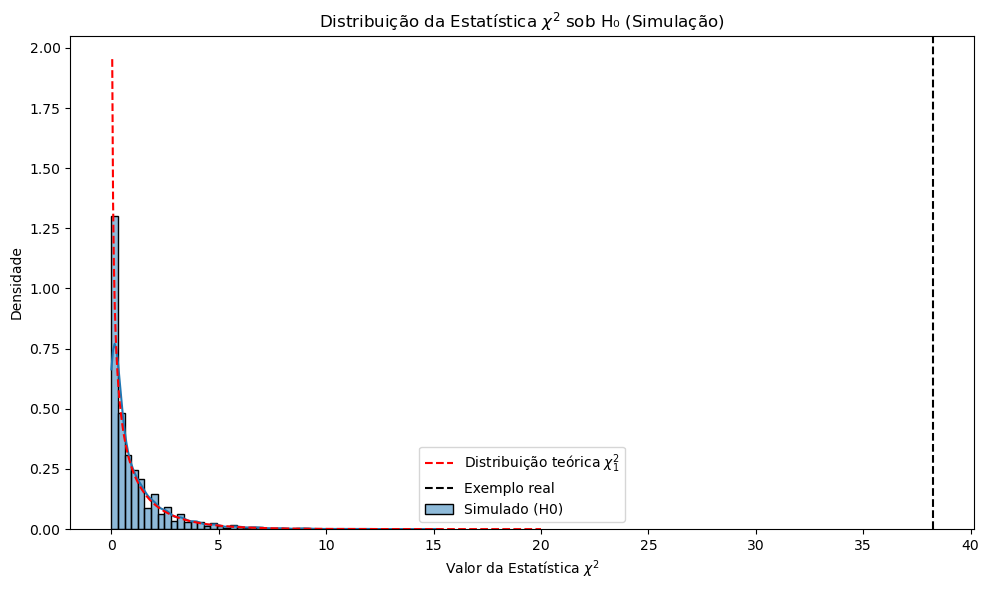

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2

# Simulação: gerar tabelas 2x2 sob H0 (sem associação)
np.random.seed(42)

# Totais fixos (como no exemplo anterior)
row_totals = [52, 48]  # Masculino, Feminino
col_totals = [51, 49]  # Dog, Cat
grand_total = 100

# Número de simulações
n_sim = 10000
chi2_stats = []

for _ in range(n_sim):
    # Simula uma tabela 2x2 com distribuição multinomial condicionada aos totais marginais
    # Usamos proporções marginais para gerar frequências esperadas
    expected = np.outer(row_totals, col_totals) / grand_total
    simulated = np.random.multinomial(grand_total, expected.flatten()/grand_total).reshape(2, 2)

    # Aplica o teste qui-quadrado
    chi2_stat, _, _, _ = chi2_contingency(simulated, correction=False)
    chi2_stats.append(chi2_stat)

# Plotar a distribuição simulada
plt.figure(figsize=(10, 6))
sns.histplot(chi2_stats, bins=50, kde=True, stat="density", label="Simulado (H0)")
x = np.linspace(0, 20, 500)
plt.plot(x, chi2.pdf(x, df=1), 'r--', label="Distribuição teórica $\chi^2_1$")
plt.axvline(x=38.25, color='black', linestyle='--', label='Exemplo real')
plt.title("Distribuição da Estatística $\chi^2$ sob H₀ (Simulação)")
plt.xlabel("Valor da Estatística $\chi^2$")
plt.ylabel("Densidade")
plt.legend()
plt.tight_layout()
plt.show()


### Interpretação:

* 🔵 **Histograma**: valores da estatística $\chi^2$ simulados a partir de dados que **seguem $H_0$** (isto é, não há associação entre as variáveis).
* 🔴 **Linha tracejada vermelha**: densidade da distribuição teórica $\chi^2_1$.
* ⚫ **Linha preta tracejada**: valor observado de $\chi^2 \approx 38.25$ do exemplo real.

### Intuição:

* A maior parte das estatísticas simuladas cai **perto de 0** — isso é esperado, pois a maioria dos desvios $O - E$ são pequenos quando $H_0$ é verdadeiro.
* O valor de 38.25 está **extremamente na cauda direita** da distribuição: isso indica que a tabela observada seria **muito improvável** se $H_0$ fosse verdadeira.
* Isso justifica a rejeição de $H_0$ com um **valor-p extremamente pequeno**.

# Teste qui-quadrado é unilateral

> O teste qui-quadrado é **sempre um teste unilateral à direita**.

Para entender a afirmação acima, considere novamente a estatística do teste qui-quadrado:

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

* Ela é **sempre não-negativa** (soma de quadrados).
* Valores **próximos de zero** indicam **boa concordância** com a hipótese nula.
* Valores **grandes** indicam **desvios expressivos** entre observado e esperado.

> Por que unilateral à direita?
* A **cauda direita da distribuição qui-quadrado** representa situações com **grande discrepância** entre os dados observados e o que seria esperado sob $H_0$.
* Assim, o **valor-p** é sempre calculado como:

$$
\text{valor-p} = P(\chi^2 \geq \text{estatística observada} \mid H_0)
$$

Repare que, ao contrário de testes como o t de Student (que podem ser unilaterais ou bilaterais), o teste qui-quadrado **sempre rejeita $H_0$** quando a estatística está **muito alta**, nunca quando está muito baixa.

**Resumo:**

| Aspecto              | Qui-quadrado                                            |
| -------------------- | ------------------------------------------------------- |
| Tipo de teste        | **Unilateral à direita**                                |
| Rejeita $H_0$ quando | Estatística $\chi^2$ é **grande**                       |
| Valor-p              | Área sob a curva à **direita** da estatística observada |

Abaixo está um gráfico da distribuição qui-quadrado com:

* 📘 **Curva azul**: a densidade da distribuição $\chi^2_3$ (com 3 graus de liberdade).
* ⚫ **Linha tracejada preta**: valor da **estatística observada** (neste exemplo, $\chi^2 = 11$).
* 🔴 **Área vermelha**: a **cauda à direita**, que representa o **valor-p**.

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_27511/2106165620.py:18: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, y_curve, label=f'Distribuição $\chi^2_{{{df}}}$', color='blue')
/tmp/ipykernel_27511/2106165620.py:27: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Valor da estatística $\chi^2$')


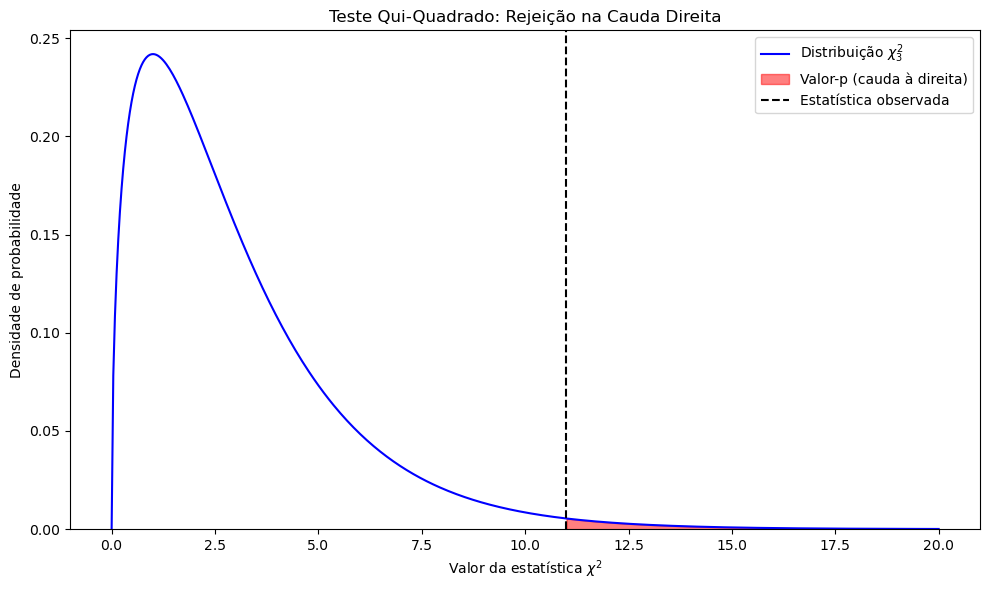

In [15]:
# Replotando com ajuste explícito da base do eixo y para incluir zero
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parâmetros
df = 3  # graus de liberdade
x = np.linspace(0, 20, 500)
chi2_stat_observado = 11

# Densidades
y_curve = chi2.pdf(x, df)
x_fill = np.linspace(chi2_stat_observado, 20, 200)
y_fill = chi2.pdf(x_fill, df)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y_curve, label=f'Distribuição $\chi^2_{{{df}}}$', color='blue')
plt.fill_between(x_fill, y_fill, y2=0, color='red', alpha=0.5, label='Valor-p (cauda à direita)')
plt.axvline(chi2_stat_observado, color='black', linestyle='--', label='Estatística observada')

# Forçar eixo y a iniciar no zero
plt.ylim(bottom=0)

# Rótulos e legenda
plt.title('Teste Qui-Quadrado: Rejeição na Cauda Direita')
plt.xlabel('Valor da estatística $\chi^2$')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.tight_layout()
plt.show()

✅ Interpretação:

* O **teste qui-quadrado é sempre unilateral à direita** porque estamos interessados em saber se o valor observado da estatística é **grande o suficiente** para indicar discrepância entre observado e esperado.
* Quanto **maior a área vermelha (valor-p)**, menor a evidência contra $H_0$.
* Se essa área for **pequena (menor que 0.05, por exemplo)**, rejeitamos $H_0$.
